In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras import backend as K

cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

In [3]:
from keras.layers import Activation ,Conv2D ,BatchNormalization , Dense ,Dropout ,Flatten ,MaxPool2D ,GlobalMaxPool2D ,GlobalAveragePooling2D
from keras.models import Sequential

In [4]:
model = Sequential([
            BatchNormalization(axis=1, input_shape=(160,320,1)),
            Conv2D(32,(3,3), activation='relu'),
            BatchNormalization(axis=1),
            Conv2D(32,(3,3), activation='relu'),
            MaxPool2D((2,2)),
            BatchNormalization(axis=1),
            Conv2D(64,(3,3), activation='relu'),
            BatchNormalization(axis=1),
            Conv2D(64,(3,3), activation='relu'),
            MaxPool2D((2,2)),
            BatchNormalization(axis=1),
            Conv2D(128,(3,3), activation='relu'),
            BatchNormalization(axis=1),
            Conv2D(128,(3,3), activation='relu'),
          
            BatchNormalization(axis=1),
            Conv2D(128,(3,3), activation='relu'),
           
            BatchNormalization(axis=1),
        Conv2D(128 ,(3,3), activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        Conv2D(128 ,(3,3), activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        
        Conv2D(4 ,(3,3), border_mode='same'),
        GlobalAveragePooling2D(),
        Activation('softmax')
           
        ])

/home/aviw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
/home/aviw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
/home/aviw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), padding="same")`


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 160, 320, 1)       640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 158, 318, 32)      320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 158, 318, 32)      632       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 156, 316, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 158, 32)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 78, 158, 32)       312       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 76, 156, 64)       18496     
__________

In [6]:
import PIL
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL.ImageOps import equalize as eq
import random
random.uniform(0.01, 1)

0.6163675271683047

In [7]:
import numpy as np
import random
from PIL.ImageOps import equalize as eq

def white (img):
    img=image.array_to_img (img)
    img= eq(img)
    return image.img_to_array (img)

In [8]:
def aug (img):
    x=lap (img)
    
    return white(x)

In [9]:


def lap (img):
    img=image.array_to_img (img).convert('RGB') 
 
    open_cv_image = np.array(img) 
# Convert RGB to BGR 
    open_cv_image = open_cv_image[:, :, ::-1].copy() 
    laplacian = cv2.Laplacian(open_cv_image,cv2.CV_64F)
    
    return laplacian

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
gen=image.ImageDataGenerator( rotation_range=15,shear_range=0.1 ,channel_shift_range=0.2,
     width_shift_range=0.4 , height_shift_range=0.25)
gen1=image.ImageDataGenerator()

In [11]:
batch_size=30

train= gen.flow_from_directory('train', target_size=(160,320),
                class_mode='categorical', shuffle=True, batch_size=batch_size,  color_mode='grayscale')

Found 5820 images belonging to 4 classes.


In [12]:
val= gen1.flow_from_directory('val', target_size=(160,320),
                class_mode='categorical', shuffle=False, batch_size=batch_size , color_mode='grayscale')

Found 1098 images belonging to 4 classes.


In [13]:
from keras.optimizers import Adam
model.compile(Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
batch_size=30
model.fit_generator(train, steps_per_epoch=5820/batch_size, epochs=1, 
                            validation_data=val, validation_steps=1098/batch_size)

Epoch 1/1
194/194 [==============================] - 456s - loss: 0.9963 - acc: 0.5780 - val_loss: 1.3856 - val_acc: 0.3106


In [26]:

model.optimizer.lr=0.1
for i in range (1,3):
    model.fit_generator(train, steps_per_epoch=5820/batch_size, epochs=1, 
                            validation_data=val, validation_steps=1098/batch_size)
    model.save_weights ('fcnn_lap{x}.h5'.format(x=i))

Epoch 1/5
80/79 [==============================] - 177s - loss: 1.2178 - acc: 0.4533 - val_loss: 1.3469 - val_acc: 0.2017
Epoch 2/5
80/79 [==============================] - 137s - loss: 1.1975 - acc: 0.4613 - val_loss: 1.3233 - val_acc: 0.5117
Epoch 3/5
80/79 [==============================] - 132s - loss: 1.1859 - acc: 0.4663 - val_loss: 1.1803 - val_acc: 0.4983
Epoch 4/5
80/79 [==============================] - 133s - loss: 1.1817 - acc: 0.4750 - val_loss: 1.4072 - val_acc: 0.3214
Epoch 5/5
80/79 [==============================] - 230s - loss: 1.1776 - acc: 0.4692 - val_loss: 1.3732 - val_acc: 0.2840
Epoch 1/5
80/79 [==============================] - 233s - loss: 1.1543 - acc: 0.4946 - val_loss: 1.2576 - val_acc: 0.3010
Epoch 2/5
80/79 [==============================] - 235s - loss: 1.1593 - acc: 0.4992 - val_loss: 1.2338 - val_acc: 0.3967
Epoch 3/5
80/79 [==============================] - 238s - loss: 1.1470 - acc: 0.4925 - val_loss: 1.1118 - val_acc: 0.6033
Epoch 4/5
80/79 [=======

In [27]:
model.optimizer.lr=0.01
for i in range (3,5):
    model.fit_generator(train, steps_per_epoch=5820/batch_size, epochs=1, 
                            validation_data=val, validation_steps=1098/batch_size)
    model.save_weights ('fcnn_lap{x}.h5'.format(x=i))

Epoch 1/5
80/79 [==============================] - 226s - loss: 1.1352 - acc: 0.4950 - val_loss: 1.4116 - val_acc: 0.2313
Epoch 2/5
80/79 [==============================] - 132s - loss: 1.1074 - acc: 0.5263 - val_loss: 1.2546 - val_acc: 0.3017
Epoch 3/5
80/79 [==============================] - 131s - loss: 1.1071 - acc: 0.5238 - val_loss: 1.0963 - val_acc: 0.5117
Epoch 4/5
80/79 [==============================] - 131s - loss: 1.0969 - acc: 0.5258 - val_loss: 1.4800 - val_acc: 0.3435
Epoch 5/5
80/79 [==============================] - 131s - loss: 1.1220 - acc: 0.5063 - val_loss: 1.2879 - val_acc: 0.4167
Epoch 1/5
80/79 [==============================] - 226s - loss: 1.0811 - acc: 0.5321 - val_loss: 1.3645 - val_acc: 0.3095
Epoch 2/5
80/79 [==============================] - 177s - loss: 1.0890 - acc: 0.5350 - val_loss: 1.2298 - val_acc: 0.3450
Epoch 3/5
80/79 [==============================] - 132s - loss: 1.0562 - acc: 0.5467 - val_loss: 1.1659 - val_acc: 0.4983
Epoch 4/5
80/79 [=======

In [28]:
model.optimizer.lr=0.001
for i in range (5,7):
    model.fit_generator(train, steps_per_epoch=5820/batch_size, epochs=1, 
                            validation_data=val, validation_steps=1098/batch_size)
    model.save_weights ('fcnn_lap{x}.h5'.format(x=i))

Epoch 1/5
80/79 [==============================] - 147s - loss: 1.0559 - acc: 0.5575 - val_loss: 1.4980 - val_acc: 0.2262
Epoch 2/5
80/79 [==============================] - 135s - loss: 1.0504 - acc: 0.5563 - val_loss: 1.2683 - val_acc: 0.3639
Epoch 3/5
80/79 [==============================] - 165s - loss: 1.0432 - acc: 0.5529 - val_loss: 1.2741 - val_acc: 0.3450
Epoch 4/5
80/79 [==============================] - 162s - loss: 1.0372 - acc: 0.5617 - val_loss: 1.2162 - val_acc: 0.4667
Epoch 5/5
80/79 [==============================] - 134s - loss: 1.0168 - acc: 0.5696 - val_loss: 1.4263 - val_acc: 0.3741
Epoch 1/5
80/79 [==============================] - 132s - loss: 1.0327 - acc: 0.5671 - val_loss: 1.5576 - val_acc: 0.1939
Epoch 2/5
80/79 [==============================] - 131s - loss: 1.0387 - acc: 0.5713 - val_loss: 1.3600 - val_acc: 0.2772
Epoch 3/5
80/79 [==============================] - 165s - loss: 1.0260 - acc: 0.5442 - val_loss: 1.2883 - val_acc: 0.3483
Epoch 4/5
80/79 [=======

In [17]:
model.optimizer.lr=0.0001
for i in range (7,9):
    model.fit_generator(train, steps_per_epoch=5820/batch_size, epochs=1, 
                            validation_data=val, validation_steps=1098/batch_size)
    model.save_weights ('fcnn_lap{x}.h5'.format(x=i))

Epoch 1/1
194/194 [==============================] - 310s - loss: 0.9799 - acc: 0.5802 - val_loss: 1.5724 - val_acc: 0.3206
Epoch 1/1
194/194 [==============================] - 310s - loss: 0.9817 - acc: 0.5880 - val_loss: 1.5475 - val_acc: 0.2905


In [ ]:
model.optimizer.lr=0.00001
for i in range (13,16):
    model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)
    model.save_weights ('fcnn_{x}.h5'.format(x=i))

In [ ]:
model.optimizer.lr=0.001
model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)
model.save_weights ('fcnn5.h5')

In [ ]:

model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)
model.save_weights ('fcnn6.h5')

In [ ]:
model.optimizer.lr=0.0001
for i in range (7,17):
    model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=1, 
                            validation_data=val, validation_steps=594/batch_size)
    model.save_weights ('fcnn{x}.h5'.format(x=i))

In [ ]:

model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=1, 
                            validation_data=val, validation_steps=594/batch_size)

In [18]:
model.load_weights ('fcnn_lap6.h5')

In [19]:
test1 = gen1.flow_from_directory('test', target_size=(160,320),
                class_mode='categorical', shuffle=False, batch_size=1 , color_mode='grayscale' )

Found 200 images belonging to 4 classes.


In [20]:
pre=model.predict_generator(test1,200)

In [21]:
files = test1.filenames

In [23]:
test1.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [46]:
mistake=0
doubt=0
file=[]
file1=[]
correct=0
num=0
for x in pre : 
    
    if (x[0]<0.8 and x[0]>0.2) or (x[1]<0.8 and x[1]>0.2) or (x[2]<0.8 and x[2]>0.8) or (x[3]<0.8 and x[3]>0.2)  : 
        doubt+=1
        print (x , "doubt")
        file1.append (files[num])
    else:
        if num<50:
            if x[0]<0.3: 
                mistake+=1
                print (x,num)
                file.append (files[num])
            else : correct+=1
        elif num<100:
            if x[1]<0.3: 
                mistake+=1
                print (x,num) 
                file.append (files[num])
            else : correct+=1
        elif num<150:
            if x[2]<0.3: 
                mistake+=1
                print (x,num) 
                file.append (files[num])
            else : correct+=1
                
        else:
            if x[3]<0.3: 
                mistake+=1
                print (x,num) 
                file.append (files[num])
            else : correct+=1
    num+=1
    
all=correct+mistake

[ 0.31411651  0.00622589  0.53484643  0.14481124] doubt
[ 0.08569724  0.30430946  0.38063404  0.22935919] doubt
[ 0.25437185  0.00555307  0.61374742  0.12632769] doubt
[ 0.01026966  0.56325203  0.04025496  0.38622329] doubt
[ 0.05387009  0.39099824  0.50954688  0.04558479] doubt
[ 0.05636977  0.34427547  0.53465897  0.06469578] doubt
[ 0.06966193  0.25178218  0.61018348  0.06837247] doubt
[ 0.00473597  0.7165488   0.03583847  0.24287669] doubt
[ 0.01061953  0.24706627  0.03410969  0.70820457] doubt
[ 0.32258663  0.00569519  0.53735757  0.13436058] doubt
[ 0.06019985  0.30302131  0.5868448   0.04993406] doubt
[ 0.00931685  0.29875448  0.02835786  0.66357082] doubt
[ 0.0128026   0.24971795  0.04497126  0.69250822] doubt
[ 0.09731419  0.10335473  0.70080209  0.098529  ] 13
[ 0.10936517  0.11862994  0.69365728  0.07834762] 14
[ 0.04311079  0.76658475  0.0764008   0.11390369] doubt
[ 0.05889391  0.35273564  0.5334065   0.05496393] doubt
[ 0.06380249  0.535788    0.31082565  0.08958381] doub

In [47]:
correct/all

0.3333333333333333

In [48]:
doubt/(all+doubt)

0.895

In [49]:
mistake

14

In [ ]:
mistake/all

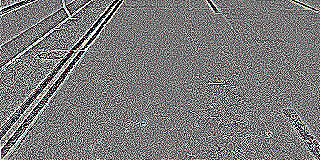

In [488]:
image.array_to_img (newtest[109])

In [ ]:
image.load_img ('test/'+files[2])

In [457]:
test = gen.flow_from_directory('test', target_size=(160,320),
                class_mode='categorical', shuffle=False, batch_size=1 )

Found 238 images belonging to 2 classes.


In [458]:
newtest = gen.flow_from_directory('newtest', target_size=(160,320),
                class_mode='categorical', shuffle=False, batch_size=1)

Found 115 images belonging to 2 classes.


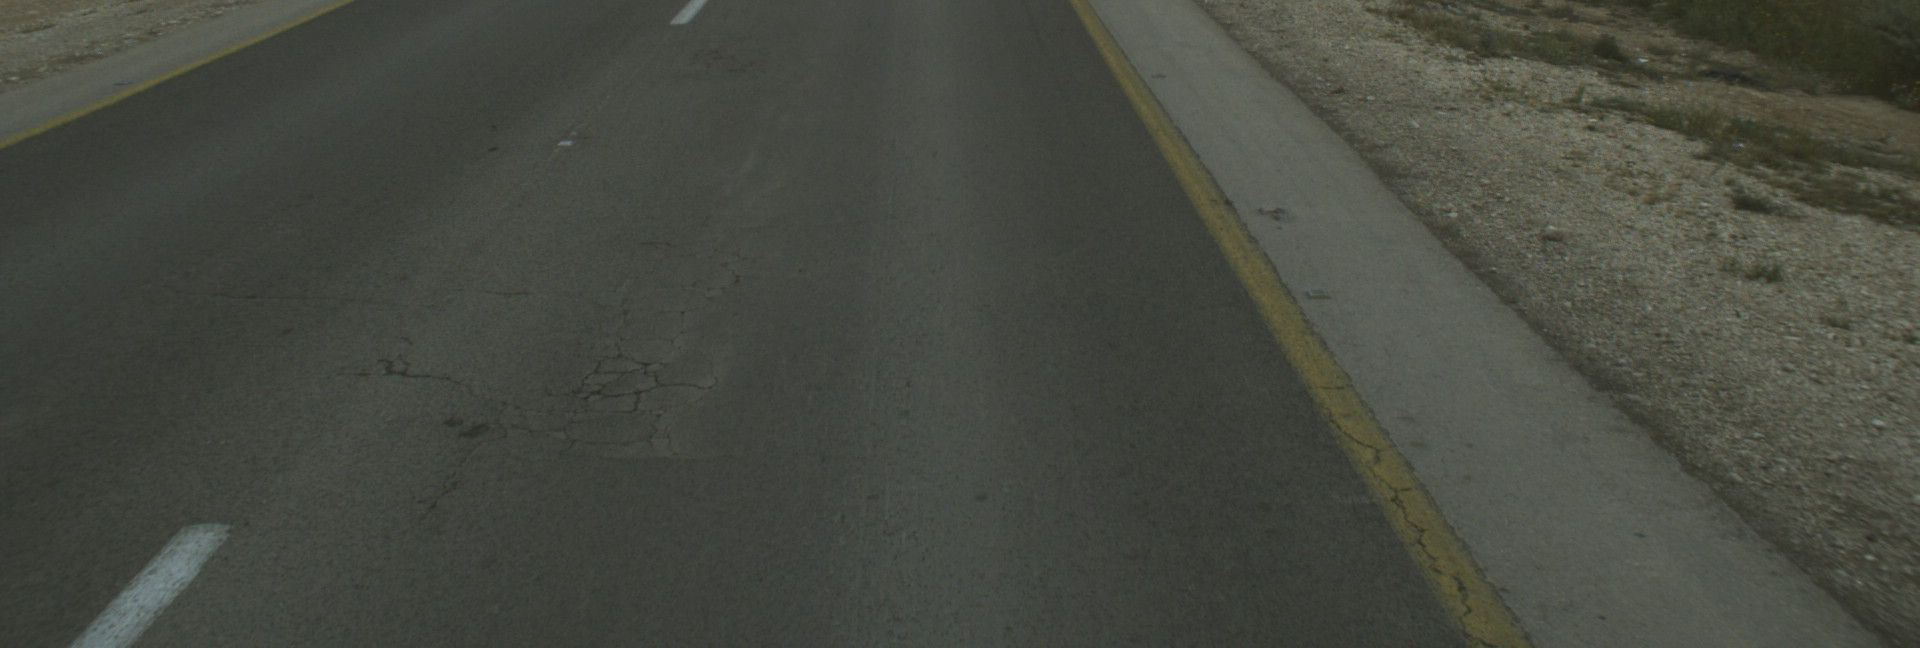

In [104]:
image.load_img ('test/'+files1[199])

In [50]:
from matplotlib import pyplot as plt

def plot(img):
    plt.imshow(to_plot(img))


def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
def to_plot(img):
    if K.image_dim_ordering() == 'tf':
        return np.rollaxis(img, 0, 1).astype(np.uint8)
    else:
        return np.rollaxis(img, 0, 3).astype(np.uint8)

In [51]:
%matplotlib inline

In [249]:
import numpy as np
train = gen1.flow_from_directory('train', target_size=(160,320),
                class_mode=None, shuffle=False, batch_size=1 ,color_mode='grayscale' )
train1=np.concatenate([train.next() for i in range(train.samples)])
val = gen1.flow_from_directory('val', target_size=(160,320),
                class_mode=None, shuffle=False, batch_size=1,color_mode='grayscale'  )
val1=np.concatenate([val.next() for i in range(val.samples)])

Found 5820 images belonging to 4 classes.
Found 1098 images belonging to 4 classes.


In [250]:
import bcolz
def save_array(fname, arr): c=bcolz.carray(arr, rootdir=fname, mode='w'); c.flush()
def load_array(fname): return bcolz.open(fname)[:]

In [251]:
save_array ('train1.bc',train1)

In [252]:
save_array ('val1.bc',val1)

In [ ]:
train1=load_array ('train1.bc')
val1=load_array ('val1.bc')

In [52]:
test = gen1.flow_from_directory('test', target_size=(160,320),
                class_mode=None, shuffle=False, batch_size=1 ,color_mode='grayscale' )


import numpy as np
test1=np.concatenate([test.next() for i in range(test.samples)])


Found 200 images belonging to 4 classes.


In [53]:
from PIL import Image as img

In [54]:
x1= img.open ('test/'+files[15]).convert("L")
x2= img.open ('test/'+files[58]).convert("L")
x3= img.open ('test/'+files[112]).convert("L")
x4= img.open ('test/'+files[151]).convert("L")
arr1 = np.asarray(x1)
arr2 = np.asarray(x2)
arr3 = np.asarray(x3)
arr4 = np.asarray(x4)

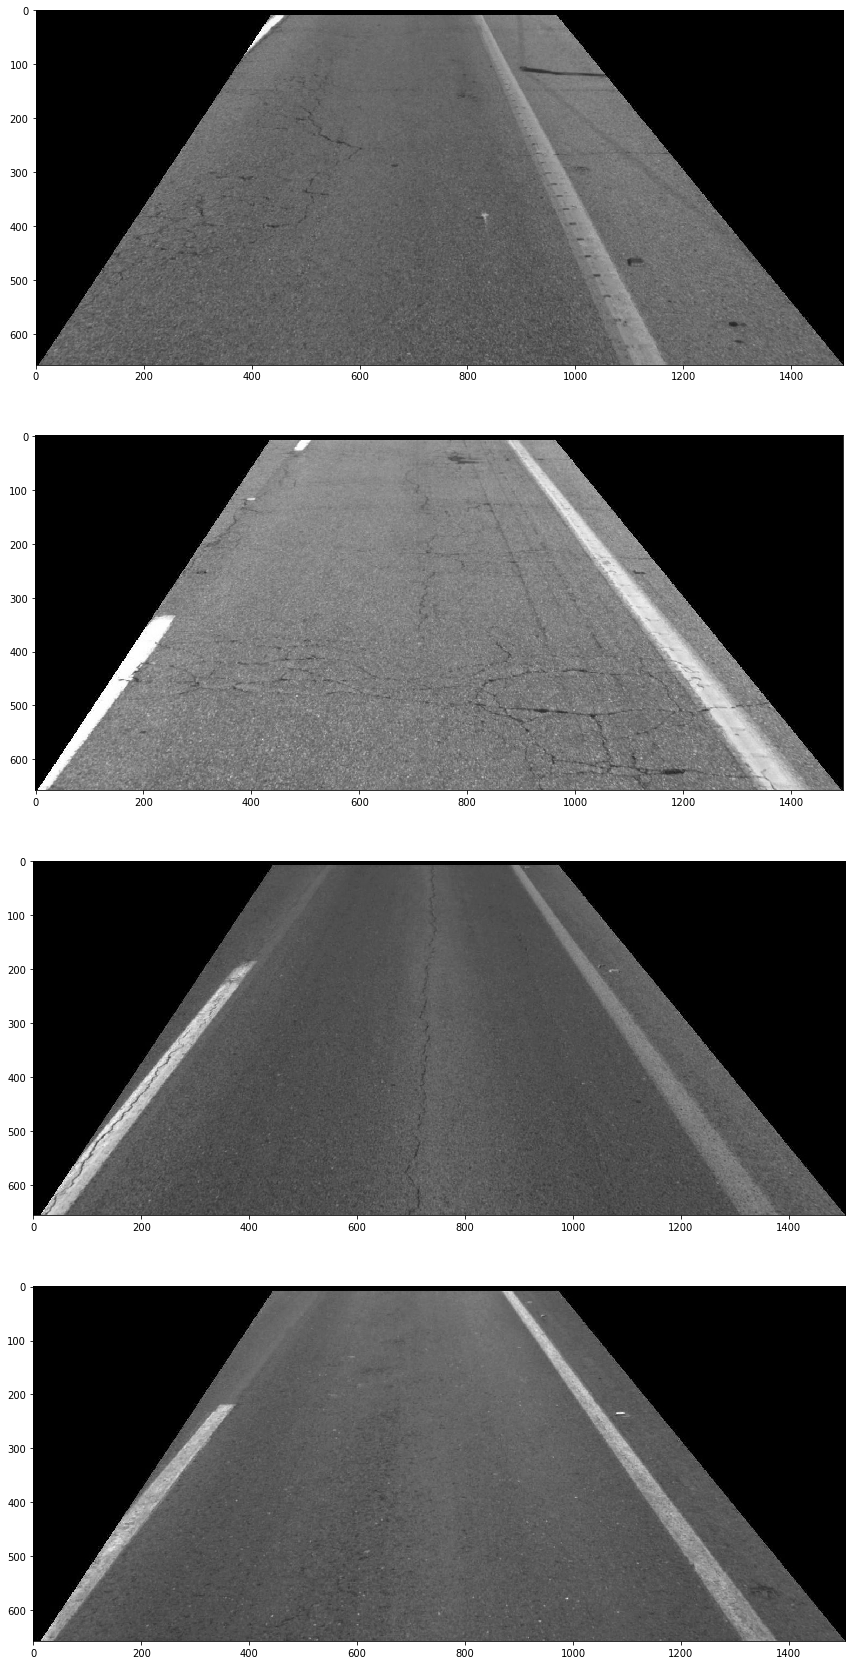

In [126]:
plt.subplots(figsize=(15, 30))
plt.subplot(4, 1, 1 )
plt.imshow(arr1, cmap='gray')
plt.subplot(4, 1, 2 )
plt.imshow(arr2, cmap='gray')
plt.subplot(4, 1, 3 )
plt.imshow(arr3, cmap='gray')
plt.subplot(4, 1, 4 )
plt.imshow(arr4, cmap='gray')

In [56]:
al=test1[15]
bl=test1[58]
lotr=test1[112]
ra=test1[151]

In [115]:
from keras import backend as K
l =model.layers
conv_fn = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[-8].output])

In [116]:
inp = np.expand_dims(al, 0)
conv = conv_fn([inp,0])
conv=conv[0]

show=np.swapaxes(conv,2,3)
show=np.swapaxes(show,1,2)
show1=show[0]
    
inp = np.expand_dims(bl, 0)
conv = conv_fn([inp,0])
conv=conv[0]

show=np.swapaxes(conv,2,3)
show=np.swapaxes(show,1,2)
show2=show[0]

inp = np.expand_dims(lotr, 0)
conv = conv_fn([inp,0])
conv=conv[0]

show=np.swapaxes(conv,2,3)
show=np.swapaxes(show,1,2)
show3=show[0]


inp = np.expand_dims(ra, 0)
conv = conv_fn([inp,0])
conv=conv[0]

show=np.swapaxes(conv,2,3)
show=np.swapaxes(show,1,2)
show4=show[0]

In [117]:
show3.shape

(128, 31, 71)

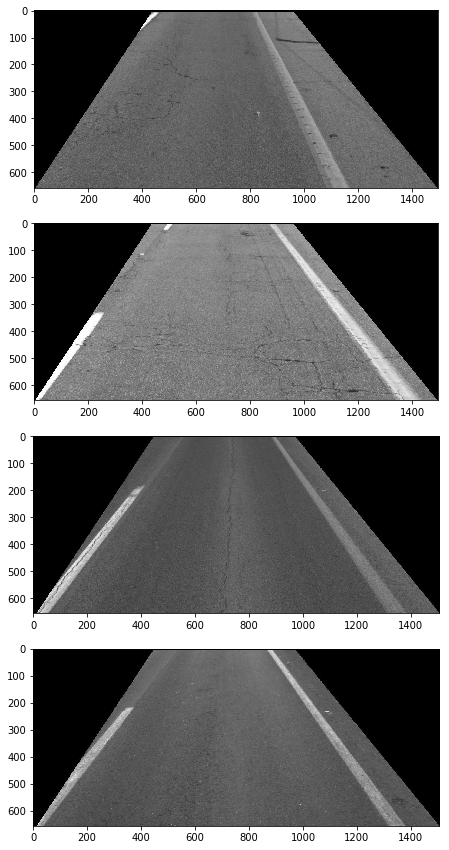

In [118]:
plt.subplots(figsize=(15, 15))
plt.subplot(4, 1, 1 )
plt.imshow(arr1, cmap='gray')
plt.subplot(4, 1, 2 )
plt.imshow(arr2, cmap='gray')
plt.subplot(4, 1, 3 )
plt.imshow(arr3, cmap='gray')
plt.subplot(4, 1, 4 )
plt.imshow(arr4, cmap='gray')

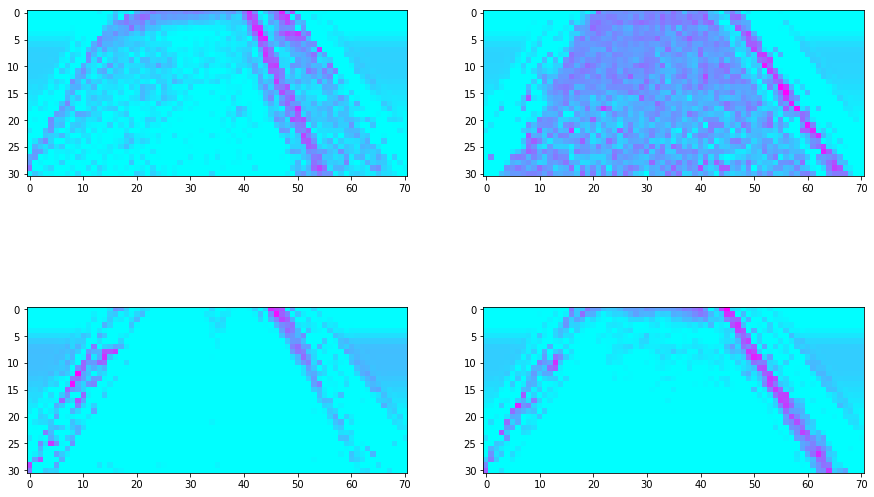

In [248]:
num=127
plt.subplots(figsize=(15, 10))

plt.subplot(2, 2, 1 )
plt.imshow (show1[num] , cmap="cool") 
plt.subplot(2, 2, 2 )
plt.imshow (show2[num] , cmap="cool") 
plt.subplot(2, 2, 3 )
plt.imshow (show3[num] , cmap="cool") 
plt.subplot(2, 2, 4 )
plt.imshow (show4[num] , cmap="cool") 

In [253]:
newtrain=[]
for pic in range (5820):
    inp = np.expand_dims(train1[pic], 0)
    conv = conv_fn([inp,0])
    conv=conv[0]

    show=np.swapaxes(conv,2,3)
    show=np.swapaxes(show,1,2)
    show=show[0]
    
    x=[]
  
    x.append (show[0])
    x.append (show[17]) 
    x.append (show[21])
    x.append (show[37])
    x.append (show[38])
    x.append (show[39])
    x.append (show[44])
    x.append (show[45])
    x.append (show[53])
    x.append (show[62]) 
    x.append (show[94])
    x.append (show[100])
    x.append (show[102])
    x.append (show[109])
    x.append (show[110])
    x.append (show[113])
    newtrain.append(x)


In [254]:
newtrain=np.array(newtrain)

In [255]:
newtrain.shape

(5820, 16, 31, 71)

In [256]:
newval=[]
for pic in range (1098):
    inp = np.expand_dims(val1[pic], 0)
    conv = conv_fn([inp,0])
    conv=conv[0]

    show=np.swapaxes(conv,2,3)
    show=np.swapaxes(show,1,2)
    show=show[0]
    
    x=[]
   
   
    x.append (show[0])
    x.append (show[17]) 
    x.append (show[21])
    x.append (show[37])
    x.append (show[38])
    x.append (show[39])
    x.append (show[44])
    x.append (show[45])
    x.append (show[53])
    x.append (show[62]) 
    x.append (show[94])
    x.append (show[100])
    x.append (show[102])
    x.append (show[109])
    x.append (show[110])
    x.append (show[113])
   
    newval.append(x)

In [257]:
newval=np.array(newval)

In [258]:
newval.shape

(1098, 16, 31, 71)

In [259]:
newtest=[]
for pic in range (200):
    inp = np.expand_dims(test1[pic], 0)
    conv = conv_fn([inp,0])
    conv=conv[0]

    show=np.swapaxes(conv,2,3)
    show=np.swapaxes(show,1,2)
    show=show[0]
    
    x=[]
  
    
    x.append (show[0])
    x.append (show[17]) 
    x.append (show[21])
    x.append (show[37])
    x.append (show[38])
    x.append (show[39])
    x.append (show[44])
    x.append (show[45])
    x.append (show[53])
    x.append (show[62]) 
    x.append (show[94])
    x.append (show[100])
    x.append (show[102])
    x.append (show[109])
    x.append (show[110])
    x.append (show[113])
   
    newtest.append(x)

In [260]:
newtest=np.array(newtest)

In [261]:
newtest.shape

(200, 16, 31, 71)

In [262]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
def onehot(x): return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())

val_classes = val.classes
trn_classes = train.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)

In [317]:
model1 = Sequential([
    
    MaxPool2D(input_shape = (16, 31, 71)),
    GlobalAveragePooling2D(),
   
    Dense(4, activation='softmax' )
    ])

In [318]:
from keras.optimizers import Adam ,SGD ,Adamax ,RMSprop
model1.compile(Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [319]:
model1.fit (newtrain,trn_labels , batch_size=50 , epochs=20, shuffle=True , validation_data= (newval,val_labels))

Train on 5820 samples, validate on 1098 samples
Epoch 1/20
5820/5820 [==============================] - 1s - loss: 1.8443 - acc: 0.2351 - val_loss: 1.6432 - val_acc: 0.2723
Epoch 2/20
5820/5820 [==============================] - 0s - loss: 1.8047 - acc: 0.2347 - val_loss: 1.6185 - val_acc: 0.2714
Epoch 3/20
5820/5820 [==============================] - 0s - loss: 1.7672 - acc: 0.2342 - val_loss: 1.5954 - val_acc: 0.2714
Epoch 4/20
5820/5820 [==============================] - 0s - loss: 1.7322 - acc: 0.2337 - val_loss: 1.5739 - val_acc: 0.2714
Epoch 5/20
5820/5820 [==============================] - 0s - loss: 1.6994 - acc: 0.2332 - val_loss: 1.5540 - val_acc: 0.2705
Epoch 6/20
5820/5820 [==============================] - 0s - loss: 1.6687 - acc: 0.2328 - val_loss: 1.5356 - val_acc: 0.2714
Epoch 7/20
5820/5820 [==============================] - 0s - loss: 1.6401 - acc: 0.2318 - val_loss: 1.5187 - val_acc: 0.2705
Epoch 8/20
5820/5820 [==============================] - 0s - loss: 1.6137 - a

In [320]:
model.optimizer.lr=0.1
model1.fit (newtrain,trn_labels , batch_size=50 , epochs=1200, shuffle=True , validation_data= (newval,val_labels))

Train on 5820 samples, validate on 1098 samples
Epoch 1/1200
5820/5820 [==============================] - 0s - loss: 1.4267 - acc: 0.2194 - val_loss: 1.4025 - val_acc: 0.2158
Epoch 2/1200
5820/5820 [==============================] - 0s - loss: 1.4207 - acc: 0.2208 - val_loss: 1.4000 - val_acc: 0.2231
Epoch 3/1200
5820/5820 [==============================] - 0s - loss: 1.4155 - acc: 0.2253 - val_loss: 1.3977 - val_acc: 0.2240
Epoch 4/1200
5820/5820 [==============================] - 0s - loss: 1.4109 - acc: 0.2306 - val_loss: 1.3959 - val_acc: 0.2268
Epoch 5/1200
5820/5820 [==============================] - 0s - loss: 1.4067 - acc: 0.2349 - val_loss: 1.3942 - val_acc: 0.2204
Epoch 6/1200
5820/5820 [==============================] - 0s - loss: 1.4031 - acc: 0.2407 - val_loss: 1.3926 - val_acc: 0.2259
Epoch 7/1200
5820/5820 [==============================] - 0s - loss: 1.3998 - acc: 0.2495 - val_loss: 1.3915 - val_acc: 0.2295
Epoch 8/1200
5820/5820 [==============================] - 0s - 

5820/5820 [==============================] - 0s - loss: 1.3250 - acc: 0.3557 - val_loss: 1.3618 - val_acc: 0.2623
Epoch 65/1200
5820/5820 [==============================] - 0s - loss: 1.3241 - acc: 0.3553 - val_loss: 1.3614 - val_acc: 0.2632
Epoch 66/1200
5820/5820 [==============================] - 0s - loss: 1.3232 - acc: 0.3562 - val_loss: 1.3611 - val_acc: 0.2641
Epoch 67/1200
5820/5820 [==============================] - 0s - loss: 1.3224 - acc: 0.3576 - val_loss: 1.3608 - val_acc: 0.2659
Epoch 68/1200
5820/5820 [==============================] - 0s - loss: 1.3215 - acc: 0.3581 - val_loss: 1.3605 - val_acc: 0.2641
Epoch 69/1200
5820/5820 [==============================] - 0s - loss: 1.3207 - acc: 0.3593 - val_loss: 1.3601 - val_acc: 0.2650
Epoch 70/1200
5820/5820 [==============================] - 0s - loss: 1.3198 - acc: 0.3601 - val_loss: 1.3599 - val_acc: 0.2659
Epoch 71/1200
5820/5820 [==============================] - 0s - loss: 1.3191 - acc: 0.3608 - val_loss: 1.3596 - val_ac

5820/5820 [==============================] - 0s - loss: 1.2864 - acc: 0.3930 - val_loss: 1.3498 - val_acc: 0.2760
Epoch 128/1200
5820/5820 [==============================] - 0s - loss: 1.2860 - acc: 0.3930 - val_loss: 1.3497 - val_acc: 0.2787
Epoch 129/1200
5820/5820 [==============================] - 0s - loss: 1.2856 - acc: 0.3935 - val_loss: 1.3496 - val_acc: 0.2769
Epoch 130/1200
5820/5820 [==============================] - 0s - loss: 1.2852 - acc: 0.3938 - val_loss: 1.3495 - val_acc: 0.2760
Epoch 131/1200
5820/5820 [==============================] - 0s - loss: 1.2848 - acc: 0.3943 - val_loss: 1.3494 - val_acc: 0.2787
Epoch 132/1200
5820/5820 [==============================] - 0s - loss: 1.2844 - acc: 0.3943 - val_loss: 1.3493 - val_acc: 0.2787
Epoch 133/1200
5820/5820 [==============================] - 0s - loss: 1.2840 - acc: 0.3954 - val_loss: 1.3493 - val_acc: 0.2787
Epoch 134/1200
5820/5820 [==============================] - 0s - loss: 1.2836 - acc: 0.3955 - val_loss: 1.3492 -

5820/5820 [==============================] - 0s - loss: 1.2668 - acc: 0.4129 - val_loss: 1.3468 - val_acc: 0.2869
Epoch 191/1200
5820/5820 [==============================] - 0s - loss: 1.2665 - acc: 0.4131 - val_loss: 1.3468 - val_acc: 0.2860
Epoch 192/1200
5820/5820 [==============================] - 0s - loss: 1.2663 - acc: 0.4141 - val_loss: 1.3467 - val_acc: 0.2869
Epoch 193/1200
5820/5820 [==============================] - 0s - loss: 1.2661 - acc: 0.4149 - val_loss: 1.3467 - val_acc: 0.2860
Epoch 194/1200
5820/5820 [==============================] - 0s - loss: 1.2658 - acc: 0.4156 - val_loss: 1.3468 - val_acc: 0.2869
Epoch 195/1200
5820/5820 [==============================] - 0s - loss: 1.2656 - acc: 0.4158 - val_loss: 1.3467 - val_acc: 0.2842
Epoch 196/1200
5820/5820 [==============================] - 0s - loss: 1.2654 - acc: 0.4165 - val_loss: 1.3467 - val_acc: 0.2842
Epoch 197/1200
5820/5820 [==============================] - 0s - loss: 1.2652 - acc: 0.4167 - val_loss: 1.3466 -

5820/5820 [==============================] - 0s - loss: 1.2551 - acc: 0.4268 - val_loss: 1.3462 - val_acc: 0.2905
Epoch 254/1200
5820/5820 [==============================] - 0s - loss: 1.2549 - acc: 0.4266 - val_loss: 1.3463 - val_acc: 0.2914
Epoch 255/1200
5820/5820 [==============================] - 0s - loss: 1.2548 - acc: 0.4258 - val_loss: 1.3463 - val_acc: 0.2896
Epoch 256/1200
5820/5820 [==============================] - 0s - loss: 1.2546 - acc: 0.4261 - val_loss: 1.3463 - val_acc: 0.2896
Epoch 257/1200
5820/5820 [==============================] - 0s - loss: 1.2545 - acc: 0.4253 - val_loss: 1.3463 - val_acc: 0.2896
Epoch 258/1200
5820/5820 [==============================] - 0s - loss: 1.2543 - acc: 0.4270 - val_loss: 1.3463 - val_acc: 0.2896
Epoch 259/1200
5820/5820 [==============================] - 0s - loss: 1.2542 - acc: 0.4254 - val_loss: 1.3463 - val_acc: 0.2887
Epoch 260/1200
5820/5820 [==============================] - 0s - loss: 1.2540 - acc: 0.4261 - val_loss: 1.3463 -

5820/5820 [==============================] - 0s - loss: 1.2471 - acc: 0.4270 - val_loss: 1.3464 - val_acc: 0.2905
Epoch 317/1200
5820/5820 [==============================] - 0s - loss: 1.2470 - acc: 0.4273 - val_loss: 1.3464 - val_acc: 0.2896
Epoch 318/1200
5820/5820 [==============================] - 0s - loss: 1.2469 - acc: 0.4271 - val_loss: 1.3464 - val_acc: 0.2914
Epoch 319/1200
5820/5820 [==============================] - 0s - loss: 1.2468 - acc: 0.4278 - val_loss: 1.3464 - val_acc: 0.2914
Epoch 320/1200
5820/5820 [==============================] - 0s - loss: 1.2467 - acc: 0.4273 - val_loss: 1.3464 - val_acc: 0.2914
Epoch 321/1200
5820/5820 [==============================] - 0s - loss: 1.2466 - acc: 0.4278 - val_loss: 1.3464 - val_acc: 0.2933
Epoch 322/1200
5820/5820 [==============================] - 0s - loss: 1.2465 - acc: 0.4275 - val_loss: 1.3464 - val_acc: 0.2923
Epoch 323/1200
5820/5820 [==============================] - 0s - loss: 1.2464 - acc: 0.4277 - val_loss: 1.3465 -

5820/5820 [==============================] - 0s - loss: 1.2413 - acc: 0.4352 - val_loss: 1.3467 - val_acc: 0.3005
Epoch 380/1200
5820/5820 [==============================] - 0s - loss: 1.2412 - acc: 0.4345 - val_loss: 1.3466 - val_acc: 0.2996
Epoch 381/1200
5820/5820 [==============================] - 0s - loss: 1.2412 - acc: 0.4349 - val_loss: 1.3467 - val_acc: 0.2996
Epoch 382/1200
5820/5820 [==============================] - 0s - loss: 1.2411 - acc: 0.4349 - val_loss: 1.3467 - val_acc: 0.2996
Epoch 383/1200
5820/5820 [==============================] - 0s - loss: 1.2410 - acc: 0.4352 - val_loss: 1.3466 - val_acc: 0.2996
Epoch 384/1200
5820/5820 [==============================] - 0s - loss: 1.2409 - acc: 0.4352 - val_loss: 1.3466 - val_acc: 0.2996
Epoch 385/1200
5820/5820 [==============================] - 0s - loss: 1.2408 - acc: 0.4354 - val_loss: 1.3467 - val_acc: 0.2996
Epoch 386/1200
5820/5820 [==============================] - 0s - loss: 1.2407 - acc: 0.4347 - val_loss: 1.3467 -

5820/5820 [==============================] - 0s - loss: 1.2368 - acc: 0.4371 - val_loss: 1.3468 - val_acc: 0.3033
Epoch 443/1200
5820/5820 [==============================] - 0s - loss: 1.2368 - acc: 0.4387 - val_loss: 1.3468 - val_acc: 0.3042
Epoch 444/1200
5820/5820 [==============================] - 0s - loss: 1.2367 - acc: 0.4385 - val_loss: 1.3468 - val_acc: 0.3033
Epoch 445/1200
5820/5820 [==============================] - 0s - loss: 1.2366 - acc: 0.4385 - val_loss: 1.3468 - val_acc: 0.3033
Epoch 446/1200
5820/5820 [==============================] - 0s - loss: 1.2365 - acc: 0.4381 - val_loss: 1.3468 - val_acc: 0.3033
Epoch 447/1200
5820/5820 [==============================] - 0s - loss: 1.2365 - acc: 0.4376 - val_loss: 1.3468 - val_acc: 0.3024
Epoch 448/1200
5820/5820 [==============================] - 0s - loss: 1.2364 - acc: 0.4380 - val_loss: 1.3468 - val_acc: 0.3033
Epoch 449/1200
5820/5820 [==============================] - 0s - loss: 1.2364 - acc: 0.4383 - val_loss: 1.3468 -

5820/5820 [==============================] - 0s - loss: 1.2331 - acc: 0.4412 - val_loss: 1.3469 - val_acc: 0.3042
Epoch 506/1200
5820/5820 [==============================] - 0s - loss: 1.2331 - acc: 0.4409 - val_loss: 1.3470 - val_acc: 0.3042
Epoch 507/1200
5820/5820 [==============================] - 0s - loss: 1.2330 - acc: 0.4414 - val_loss: 1.3469 - val_acc: 0.3042
Epoch 508/1200
5820/5820 [==============================] - 0s - loss: 1.2330 - acc: 0.4416 - val_loss: 1.3469 - val_acc: 0.3042
Epoch 509/1200
5820/5820 [==============================] - 0s - loss: 1.2329 - acc: 0.4416 - val_loss: 1.3469 - val_acc: 0.3042
Epoch 510/1200
5820/5820 [==============================] - 0s - loss: 1.2329 - acc: 0.4423 - val_loss: 1.3469 - val_acc: 0.3042
Epoch 511/1200
5820/5820 [==============================] - 0s - loss: 1.2328 - acc: 0.4412 - val_loss: 1.3469 - val_acc: 0.3042
Epoch 512/1200
5820/5820 [==============================] - 0s - loss: 1.2328 - acc: 0.4416 - val_loss: 1.3470 -

5820/5820 [==============================] - 0s - loss: 1.2301 - acc: 0.4452 - val_loss: 1.3470 - val_acc: 0.3087
Epoch 569/1200
5820/5820 [==============================] - 0s - loss: 1.2300 - acc: 0.4448 - val_loss: 1.3470 - val_acc: 0.3087
Epoch 570/1200
5820/5820 [==============================] - 0s - loss: 1.2300 - acc: 0.4450 - val_loss: 1.3470 - val_acc: 0.3097
Epoch 571/1200
5820/5820 [==============================] - 0s - loss: 1.2300 - acc: 0.4447 - val_loss: 1.3470 - val_acc: 0.3087
Epoch 572/1200
5820/5820 [==============================] - 0s - loss: 1.2299 - acc: 0.4443 - val_loss: 1.3470 - val_acc: 0.3097
Epoch 573/1200
5820/5820 [==============================] - 0s - loss: 1.2299 - acc: 0.4452 - val_loss: 1.3470 - val_acc: 0.3097
Epoch 574/1200
5820/5820 [==============================] - 0s - loss: 1.2298 - acc: 0.4445 - val_loss: 1.3470 - val_acc: 0.3097
Epoch 575/1200
5820/5820 [==============================] - 0s - loss: 1.2298 - acc: 0.4448 - val_loss: 1.3470 -

5820/5820 [==============================] - 0s - loss: 1.2275 - acc: 0.4467 - val_loss: 1.3471 - val_acc: 0.3160
Epoch 632/1200
5820/5820 [==============================] - 0s - loss: 1.2275 - acc: 0.4464 - val_loss: 1.3471 - val_acc: 0.3160
Epoch 633/1200
5820/5820 [==============================] - 0s - loss: 1.2274 - acc: 0.4457 - val_loss: 1.3471 - val_acc: 0.3160
Epoch 634/1200
5820/5820 [==============================] - 0s - loss: 1.2274 - acc: 0.4464 - val_loss: 1.3471 - val_acc: 0.3169
Epoch 635/1200
5820/5820 [==============================] - 0s - loss: 1.2274 - acc: 0.4462 - val_loss: 1.3471 - val_acc: 0.3160
Epoch 636/1200
5820/5820 [==============================] - 0s - loss: 1.2273 - acc: 0.4459 - val_loss: 1.3471 - val_acc: 0.3179
Epoch 637/1200
5820/5820 [==============================] - 0s - loss: 1.2273 - acc: 0.4459 - val_loss: 1.3471 - val_acc: 0.3169
Epoch 638/1200
5820/5820 [==============================] - 0s - loss: 1.2272 - acc: 0.4455 - val_loss: 1.3471 -

5820/5820 [==============================] - 0s - loss: 1.2253 - acc: 0.4467 - val_loss: 1.3471 - val_acc: 0.3215
Epoch 695/1200
5820/5820 [==============================] - 0s - loss: 1.2252 - acc: 0.4471 - val_loss: 1.3471 - val_acc: 0.3206
Epoch 696/1200
5820/5820 [==============================] - 0s - loss: 1.2252 - acc: 0.4474 - val_loss: 1.3471 - val_acc: 0.3206
Epoch 697/1200
5820/5820 [==============================] - 0s - loss: 1.2252 - acc: 0.4473 - val_loss: 1.3471 - val_acc: 0.3215
Epoch 698/1200
5820/5820 [==============================] - 0s - loss: 1.2252 - acc: 0.4467 - val_loss: 1.3471 - val_acc: 0.3215
Epoch 699/1200
5820/5820 [==============================] - 0s - loss: 1.2251 - acc: 0.4469 - val_loss: 1.3471 - val_acc: 0.3206
Epoch 700/1200
5820/5820 [==============================] - 0s - loss: 1.2251 - acc: 0.4469 - val_loss: 1.3471 - val_acc: 0.3215
Epoch 701/1200
5820/5820 [==============================] - 0s - loss: 1.2250 - acc: 0.4467 - val_loss: 1.3471 -

5820/5820 [==============================] - 0s - loss: 1.2233 - acc: 0.4478 - val_loss: 1.3471 - val_acc: 0.3260
Epoch 758/1200
5820/5820 [==============================] - 0s - loss: 1.2233 - acc: 0.4479 - val_loss: 1.3471 - val_acc: 0.3242
Epoch 759/1200
5820/5820 [==============================] - 0s - loss: 1.2233 - acc: 0.4478 - val_loss: 1.3471 - val_acc: 0.3251
Epoch 760/1200
5820/5820 [==============================] - 0s - loss: 1.2232 - acc: 0.4478 - val_loss: 1.3471 - val_acc: 0.3251
Epoch 761/1200
5820/5820 [==============================] - 0s - loss: 1.2232 - acc: 0.4485 - val_loss: 1.3471 - val_acc: 0.3251
Epoch 762/1200
5820/5820 [==============================] - 0s - loss: 1.2232 - acc: 0.4479 - val_loss: 1.3471 - val_acc: 0.3251
Epoch 763/1200
5820/5820 [==============================] - 0s - loss: 1.2232 - acc: 0.4479 - val_loss: 1.3470 - val_acc: 0.3242
Epoch 764/1200
5820/5820 [==============================] - 0s - loss: 1.2231 - acc: 0.4478 - val_loss: 1.3471 -

5820/5820 [==============================] - 0s - loss: 1.2216 - acc: 0.4490 - val_loss: 1.3471 - val_acc: 0.3288
Epoch 821/1200
5820/5820 [==============================] - 0s - loss: 1.2216 - acc: 0.4488 - val_loss: 1.3470 - val_acc: 0.3288
Epoch 822/1200
5820/5820 [==============================] - 0s - loss: 1.2215 - acc: 0.4488 - val_loss: 1.3471 - val_acc: 0.3288
Epoch 823/1200
5820/5820 [==============================] - 0s - loss: 1.2215 - acc: 0.4497 - val_loss: 1.3471 - val_acc: 0.3288
Epoch 824/1200
5820/5820 [==============================] - 0s - loss: 1.2215 - acc: 0.4497 - val_loss: 1.3470 - val_acc: 0.3297
Epoch 825/1200
5820/5820 [==============================] - 0s - loss: 1.2215 - acc: 0.4497 - val_loss: 1.3471 - val_acc: 0.3297
Epoch 826/1200
5820/5820 [==============================] - 0s - loss: 1.2214 - acc: 0.4498 - val_loss: 1.3471 - val_acc: 0.3297
Epoch 827/1200
5820/5820 [==============================] - 0s - loss: 1.2214 - acc: 0.4495 - val_loss: 1.3471 -

5820/5820 [==============================] - 0s - loss: 1.2200 - acc: 0.4503 - val_loss: 1.3470 - val_acc: 0.3324
Epoch 884/1200
5820/5820 [==============================] - 0s - loss: 1.2200 - acc: 0.4510 - val_loss: 1.3470 - val_acc: 0.3315
Epoch 885/1200
5820/5820 [==============================] - 0s - loss: 1.2200 - acc: 0.4502 - val_loss: 1.3470 - val_acc: 0.3324
Epoch 886/1200
5820/5820 [==============================] - 0s - loss: 1.2200 - acc: 0.4503 - val_loss: 1.3470 - val_acc: 0.3324
Epoch 887/1200
5820/5820 [==============================] - 0s - loss: 1.2199 - acc: 0.4503 - val_loss: 1.3470 - val_acc: 0.3324
Epoch 888/1200
5820/5820 [==============================] - 0s - loss: 1.2199 - acc: 0.4505 - val_loss: 1.3470 - val_acc: 0.3324
Epoch 889/1200
5820/5820 [==============================] - 0s - loss: 1.2199 - acc: 0.4505 - val_loss: 1.3469 - val_acc: 0.3324
Epoch 890/1200
5820/5820 [==============================] - 0s - loss: 1.2199 - acc: 0.4507 - val_loss: 1.3470 -

5820/5820 [==============================] - 0s - loss: 1.2186 - acc: 0.4519 - val_loss: 1.3470 - val_acc: 0.3315
Epoch 947/1200
5820/5820 [==============================] - 0s - loss: 1.2186 - acc: 0.4524 - val_loss: 1.3470 - val_acc: 0.3324
Epoch 948/1200
5820/5820 [==============================] - 0s - loss: 1.2186 - acc: 0.4519 - val_loss: 1.3469 - val_acc: 0.3315
Epoch 949/1200
5820/5820 [==============================] - 0s - loss: 1.2186 - acc: 0.4521 - val_loss: 1.3469 - val_acc: 0.3315
Epoch 950/1200
5820/5820 [==============================] - 0s - loss: 1.2185 - acc: 0.4524 - val_loss: 1.3469 - val_acc: 0.3315
Epoch 951/1200
5820/5820 [==============================] - 0s - loss: 1.2185 - acc: 0.4521 - val_loss: 1.3469 - val_acc: 0.3315
Epoch 952/1200
5820/5820 [==============================] - 0s - loss: 1.2185 - acc: 0.4524 - val_loss: 1.3469 - val_acc: 0.3315
Epoch 953/1200
5820/5820 [==============================] - 0s - loss: 1.2185 - acc: 0.4521 - val_loss: 1.3469 -

5820/5820 [==============================] - 0s - loss: 1.2173 - acc: 0.4527 - val_loss: 1.3469 - val_acc: 0.3342
Epoch 1010/1200
5820/5820 [==============================] - 0s - loss: 1.2173 - acc: 0.4536 - val_loss: 1.3469 - val_acc: 0.3333
Epoch 1011/1200
5820/5820 [==============================] - 0s - loss: 1.2173 - acc: 0.4527 - val_loss: 1.3469 - val_acc: 0.3333
Epoch 1012/1200
5820/5820 [==============================] - 0s - loss: 1.2173 - acc: 0.4533 - val_loss: 1.3469 - val_acc: 0.3342
Epoch 1013/1200
5820/5820 [==============================] - 0s - loss: 1.2172 - acc: 0.4526 - val_loss: 1.3469 - val_acc: 0.3342
Epoch 1014/1200
5820/5820 [==============================] - 0s - loss: 1.2172 - acc: 0.4529 - val_loss: 1.3469 - val_acc: 0.3342
Epoch 1015/1200
5820/5820 [==============================] - 0s - loss: 1.2172 - acc: 0.4522 - val_loss: 1.3469 - val_acc: 0.3333
Epoch 1016/1200
5820/5820 [==============================] - 0s - loss: 1.2172 - acc: 0.4533 - val_loss: 1

5820/5820 [==============================] - 0s - loss: 1.2162 - acc: 0.4545 - val_loss: 1.3468 - val_acc: 0.3333
Epoch 1072/1200
5820/5820 [==============================] - 0s - loss: 1.2161 - acc: 0.4546 - val_loss: 1.3468 - val_acc: 0.3324
Epoch 1073/1200
5820/5820 [==============================] - 0s - loss: 1.2161 - acc: 0.4546 - val_loss: 1.3468 - val_acc: 0.3333
Epoch 1074/1200
5820/5820 [==============================] - 0s - loss: 1.2161 - acc: 0.4541 - val_loss: 1.3468 - val_acc: 0.3324
Epoch 1075/1200
5820/5820 [==============================] - 0s - loss: 1.2161 - acc: 0.4546 - val_loss: 1.3468 - val_acc: 0.3333
Epoch 1076/1200
5820/5820 [==============================] - 0s - loss: 1.2161 - acc: 0.4540 - val_loss: 1.3468 - val_acc: 0.3315
Epoch 1077/1200
5820/5820 [==============================] - 0s - loss: 1.2160 - acc: 0.4548 - val_loss: 1.3468 - val_acc: 0.3315
Epoch 1078/1200
5820/5820 [==============================] - 0s - loss: 1.2160 - acc: 0.4552 - val_loss: 1

5820/5820 [==============================] - 0s - loss: 1.2150 - acc: 0.4546 - val_loss: 1.3467 - val_acc: 0.3315
Epoch 1135/1200
5820/5820 [==============================] - 0s - loss: 1.2150 - acc: 0.4538 - val_loss: 1.3467 - val_acc: 0.3306
Epoch 1136/1200
5820/5820 [==============================] - 0s - loss: 1.2150 - acc: 0.4545 - val_loss: 1.3468 - val_acc: 0.3315
Epoch 1137/1200
5820/5820 [==============================] - 0s - loss: 1.2150 - acc: 0.4540 - val_loss: 1.3467 - val_acc: 0.3315
Epoch 1138/1200
5820/5820 [==============================] - 0s - loss: 1.2150 - acc: 0.4541 - val_loss: 1.3467 - val_acc: 0.3315
Epoch 1139/1200
5820/5820 [==============================] - 0s - loss: 1.2150 - acc: 0.4540 - val_loss: 1.3467 - val_acc: 0.3315
Epoch 1140/1200
5820/5820 [==============================] - 0s - loss: 1.2149 - acc: 0.4541 - val_loss: 1.3468 - val_acc: 0.3315
Epoch 1141/1200
5820/5820 [==============================] - 0s - loss: 1.2149 - acc: 0.4546 - val_loss: 1

5820/5820 [==============================] - 0s - loss: 1.2140 - acc: 0.4557 - val_loss: 1.3467 - val_acc: 0.3306
Epoch 1198/1200
5820/5820 [==============================] - 0s - loss: 1.2140 - acc: 0.4553 - val_loss: 1.3467 - val_acc: 0.3306
Epoch 1199/1200
5820/5820 [==============================] - 0s - loss: 1.2140 - acc: 0.4553 - val_loss: 1.3467 - val_acc: 0.3306
Epoch 1200/1200
5820/5820 [==============================] - 0s - loss: 1.2140 - acc: 0.4555 - val_loss: 1.3467 - val_acc: 0.3306


In [803]:
pre= model1.predict (newtest2)

In [804]:
mistake=0
doubt=0
file=[]
file1=[]
correct=0
num=0
for x in pre :
    
    if x[0]<0.8 and x[0]>0.2: 
        doubt+=1
        print (x , "doubt" )
       
    else:
        if num<0:
            if x[0]<0.8: 
                mistake+=1
                print (x,num)
               
            else : 
                correct+=1
        else:
            if x[1]<0.8: 
                mistake+=1
                print (x,num) 
               
            else : 
                correct+=1
    num+=1
    
all=correct+mistake

[ 0.36476666  0.63523334] doubt
[ 0.66995203  0.33004797] doubt
[ 0.61969554  0.38030449] doubt
[ 0.27058876  0.72941124] doubt
[  9.99982715e-01   1.73311819e-05] 4
[ 0.69527799  0.30472204] doubt
[ 0.73551303  0.26448691] doubt
[  1.00000000e+00   3.85549839e-12] 7
[  1.00000000e+00   8.67305602e-11] 8
[ 0.35482085  0.64517915] doubt
[  1.00000000e+00   8.20368426e-12] 10
[ 0.72045451  0.27954543] doubt
[ 0.98629749  0.01370249] 12
[  9.99999642e-01   3.05395019e-07] 13
[  1.00000000e+00   1.99483718e-09] 14
[  1.00000000e+00   3.75080522e-10] 15
[ 0.71231091  0.28768903] doubt
[ 0.70043093  0.2995691 ] doubt
[ 0.9883309   0.01166907] 18
[ 0.83161318  0.16838676] 19
[  1.00000000e+00   2.13850040e-08] 20
[ 0.30405587  0.69594407] doubt
[  1.00000000e+00   1.48065032e-10] 22
[ 0.28854725  0.71145272] doubt
[ 0.99413472  0.00586528] 24
[  1.00000000e+00   2.14086422e-11] 25
[  1.00000000e+00   5.47328112e-12] 26
[ 0.7174449   0.28255516] doubt
[  1.00000000e+00   1.20785004e-09] 28
[  

In [805]:
print (correct/all ,"correct")
print (doubt/(all+doubt), "doubt")
print  (mistake , "mistake")

0.011111111111111112 correct
0.21739130434782608 doubt
89 mistake
